# 2 AutoGen - Simple agent for financial analysis

The AutoGen ecosystem provides everything you need to create AI agents, especially multi-agent workflows -- framework, developer tools, and applications.

The framework uses a layered and extensible design. Layers have clearly divided responsibilities and build on top of layers below. This design enables you to use the framework at different levels of abstraction, from high-level APIs to low-level components.

Core API implements message passing, event-driven agents, and local and distributed runtime for flexibility and power. It also support cross-language support for .NET and Python.
AgentChat API implements a simpler but opinionated API for rapid prototyping. This API is built on top of the Core API and is closest to what users of v0.2 are familiar with and supports common multi-agent patterns such as two-agent chat or group chats.
Extensions API enables first- and third-party extensions continuously expanding framework capabilities. It support specific implementation of LLM clients (e.g., OpenAI, AzureOpenAI), and capabilities such as code execution.

<img src="https://github.com/microsoft/autogen/raw/main/autogen-landing.jpg" width=400>

> https://microsoft.github.io/autogen/stable/<br>
> https://github.com/microsoft/autogen

In [1]:
import autogen
import datetime
import openai
import os
import pandas as pd
import sys

from autogen import AssistantAgent, UserProxyAgent
from PIL import Image

In [2]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [3]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 20-May-2025 15:34:14


In [4]:
config_list = autogen.config_list_from_json(
    "CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4o-mini"],
    },
)

In [5]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

## 1. Agent

In [6]:
agent = AssistantAgent(
    name="agent",
    llm_config={
        "cache_seed": None,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0.,
    },
)

In [7]:
def is_termination_msg(data):
    has_content = "content" in data and data["content"] is not None
    return has_content and "TERMINATE" in data["content"]

In [8]:
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=20,
    is_termination_msg=is_termination_msg,
    code_execution_config={"work_dir": WORK_DIR},
)

## 2. Examples

### Example 1

In [9]:
user_proxy.initiate_chat(
    agent,
    message="What is the current date and time in Paris?",
)

user_proxy (to agent):

What is the current date and time in Paris?

--------------------------------------------------------------------------------
agent (to user_proxy):

To get the current date and time in Paris, I will use Python to fetch the current time in the specified timezone. Here’s the code to do that:

```python
# filename: get_paris_time.py
from datetime import datetime
import pytz

# Get the current time in Paris
paris_tz = pytz.timezone('Europe/Paris')
paris_time = datetime.now(paris_tz)

print("Current date and time in Paris:", paris_time.strftime('%Y-%m-%d %H:%M:%S'))
```

Please save this code in a file named `get_paris_time.py` and execute it.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to agent):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "get_paris_time.py", line 3, in <module>
    import pytz
ModuleNotFou

ChatResult(chat_id=None, chat_history=[{'content': 'What is the current date and time in Paris?', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'To get the current date and time in Paris, I will use Python to fetch the current time in the specified timezone. Here’s the code to do that:\n\n```python\n# filename: get_paris_time.py\nfrom datetime import datetime\nimport pytz\n\n# Get the current time in Paris\nparis_tz = pytz.timezone(\'Europe/Paris\')\nparis_time = datetime.now(paris_tz)\n\nprint("Current date and time in Paris:", paris_time.strftime(\'%Y-%m-%d %H:%M:%S\'))\n```\n\nPlease save this code in a file named `get_paris_time.py` and execute it.', 'role': 'user', 'name': 'agent'}, {'content': 'exitcode: 1 (execution failed)\nCode output: \nTraceback (most recent call last):\n  File "get_paris_time.py", line 3, in <module>\n    import pytz\nModuleNotFoundError: No module named \'pytz\'\n', 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'It seems that the `pytz`

### Example 2

In [10]:
assistant = AssistantAgent(
    "assistant",
    llm_config={
        "cache_seed": None,
        "config_list": config_list,
        "temperature": 0.7,
    },
)

user_proxy = UserProxyAgent("user_proxy",
                            human_input_mode="NEVER",
                            code_execution_config={"work_dir": WORK_DIR})

user_proxy.initiate_chat(
    assistant,
    message= """
    Generate a Python plot of Microsoft's stock prices for the 2025 year.
    Use the yfinance library to fetch the data and seaborn to create the plot.
    Save the plot as 'msft.png' in the script folder.
    """
)

user_proxy (to assistant):


    Generate a Python plot of Microsoft's stock prices for the 2025 year.
    Use the yfinance library to fetch the data and seaborn to create the plot.
    Save the plot as 'msft.png' in the script folder.
    

--------------------------------------------------------------------------------
assistant (to user_proxy):

To generate a Python plot of Microsoft's stock prices for the year 2025 using the `yfinance` library to fetch the data and `seaborn` to create the plot, I'll provide you with a complete script. 

This script will do the following:
1. Import the necessary libraries.
2. Fetch Microsoft's stock data for the year 2025 using `yfinance`.
3. Create a plot using `seaborn`.
4. Save the plot as 'msft.png' in the script folder.

Here’s the code:

```python
# filename: plot_msft.py
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Fetch Microsoft's stock data for the year 2025
msft_data = yf.download('MSF

ChatResult(chat_id=None, chat_history=[{'content': "\n    Generate a Python plot of Microsoft's stock prices for the 2025 year.\n    Use the yfinance library to fetch the data and seaborn to create the plot.\n    Save the plot as 'msft.png' in the script folder.\n    ", 'role': 'assistant', 'name': 'user_proxy'}, {'content': "To generate a Python plot of Microsoft's stock prices for the year 2025 using the `yfinance` library to fetch the data and `seaborn` to create the plot, I'll provide you with a complete script. \n\nThis script will do the following:\n1. Import the necessary libraries.\n2. Fetch Microsoft's stock data for the year 2025 using `yfinance`.\n3. Create a plot using `seaborn`.\n4. Save the plot as 'msft.png' in the script folder.\n\nHere’s the code:\n\n```python\n# filename: plot_msft.py\nimport yfinance as yf\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\n# Fetch Microsoft's stock data for the year 2025\nmsft_data = yf.download('MSFT', s

In [11]:
image_file = os.path.join(WORK_DIR, 'msft.png')
!ls $image_file -lh

-rwxrwxrwx 1 root root 51K May 20 15:36 workdir/msft.png


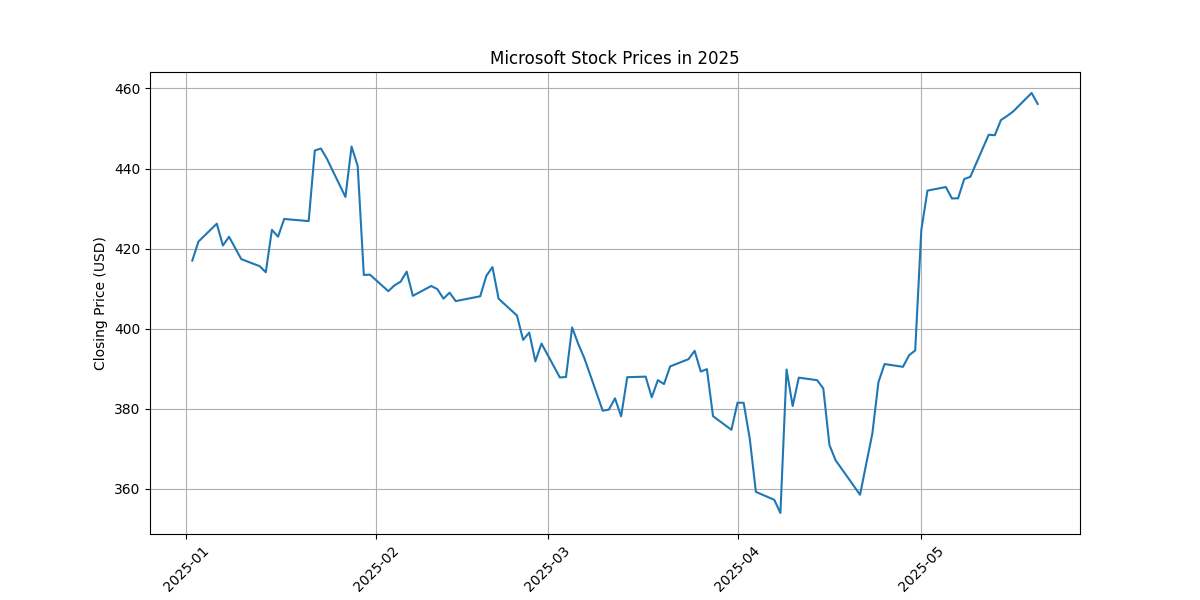

In [12]:
img = Image.open(image_file)
img

### Example 3

In [13]:
user_proxy.send(
    recipient=assistant,
    message=
    """
Plot a chart of the Year-to-Date (YTD) stock price changes for Microsoft and Nvidia over the last 3 months.
Use the yfinance library to fetch the data and seaborn to create the plot.
Apply the seaborn DARK theme. 
Save the data to 'nvidia_msft.csv' and the plot to 'nvidia_msft.png'. 
Ensure the tick labels are visible and use a double scale for the y-axis.
""",
)

user_proxy (to assistant):


Plot a chart of the Year-to-Date (YTD) stock price changes for Microsoft and Nvidia over the last 3 months.
Use the yfinance library to fetch the data and seaborn to create the plot.
Apply the seaborn DARK theme. 
Save the data to 'nvidia_msft.csv' and the plot to 'nvidia_msft.png'. 
Ensure the tick labels are visible and use a double scale for the y-axis.


--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the Year-to-Date (YTD) stock price changes for Microsoft and Nvidia over the last 3 months, we will follow these steps:

1. Import the necessary libraries.
2. Fetch the stock data for Microsoft (MSFT) and Nvidia (NVDA) for the last 3 months using the `yfinance` library.
3. Calculate the YTD price changes for both stocks.
4. Apply the seaborn DARK theme for the plot.
5. Create a plot with a double scale for the y-axis.
6. Save the data to a CSV file named 'nvidia_msft.csv' and t

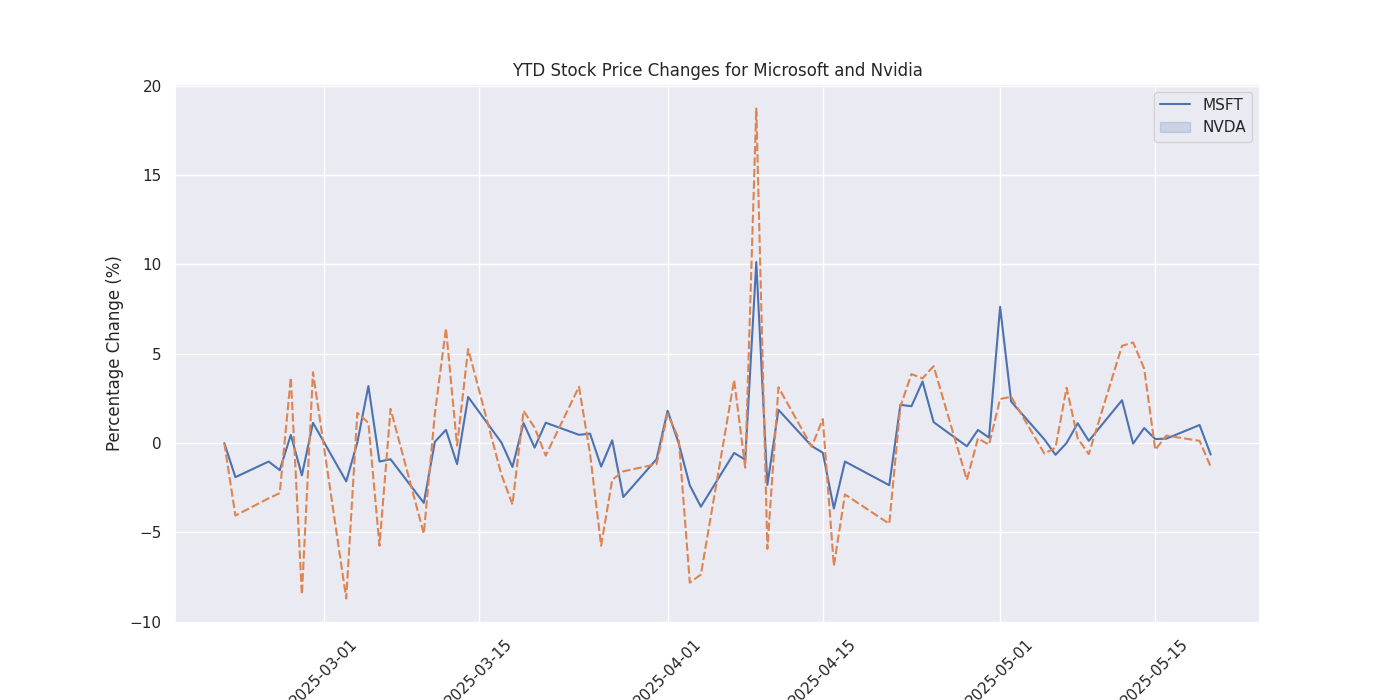

In [14]:
img = Image.open(os.path.join(WORK_DIR, 'nvidia_msft.png'))
img

In [15]:
df = pd.read_csv(os.path.join(WORK_DIR, 'nvidia_msft.csv'))
df

,Date,MSFT,NVDA
0,2025-02-20,0.000000,0.000000
1,2025-02-21,-1.903259,-4.053966
2,2025-02-24,-1.031328,-3.087104
3,2025-02-25,-1.509905,-2.801659
4,2025-02-26,0.459918,3.672117
...,...,...,...
58,2025-05-14,0.846053,4.163784
59,2025-05-15,0.225613,-0.376825
60,2025-05-16,0.251580,0.422749
61,2025-05-19,1.012615,0.125564


In [16]:
df.describe()

,MSFT,NVDA
count,63.000000,63.000000
mean,0.172210,0.018988
std,2.248899,4.369325
min,-3.660597,-8.693564
25%,-1.030257,-2.051021
50%,0.030889,0.000000
75%,1.062439,2.529539
max,10.133680,18.722740


## Example 4

In [17]:
user_proxy.send(
    recipient=assistant,
    message="Generate a financial analysis based on the stocks prices and save the results into nvidia_msft.txt",
)

user_proxy (to assistant):

Generate a financial analysis based on the stocks prices and save the results into nvidia_msft.txt

--------------------------------------------------------------------------------
assistant (to user_proxy):

To generate a financial analysis based on the stock prices of Microsoft (MSFT) and Nvidia (NVDA) and save the results into a text file named `nvidia_msft.txt`, we will follow these steps:

1. Fetch the historical stock data for Microsoft and Nvidia for the last 3 months using the `yfinance` library.
2. Calculate basic financial metrics such as average price, maximum price, minimum price, and standard deviation.
3. Write the analysis results to a text file.

Here’s the complete code to perform this task:

```python
# filename: financial_analysis.py
import yfinance as yf
import pandas as pd

# Define the ticker symbols and the period for fetching data
tickers = ['MSFT', 'NVDA']
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(months=3

In [18]:
print("\033[1;31;34m")

with open(os.path.join(WORK_DIR, 'nvidia_msft.txt'), 'r') as f:
    print(f.read())


Financial Analysis for MSFT:
Average Price: 397.94
Maximum Price: 458.87
Minimum Price: 353.91
Standard Deviation: 27.34

Financial Analysis for NVDA:
Average Price: 115.37
Maximum Price: 140.10
Minimum Price: 94.31
Standard Deviation: 10.69


